# Project 3B

## Drug Use By Age

#### Setup:

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#### Create and print DataFrame:

In [52]:
drug_use_data = pd.read_csv("drug-use-by-age.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

drug_use_data

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,0.1,35.5,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,-,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,0.1,2.0,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,0.1,64.0,4.8,3.0,2.0,4.0,8.5,9.0,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,0.4,46.0,7.0,4.0,1.8,4.0,9.2,12.0,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,0.5,180.0,8.6,3.0,1.4,3.0,9.4,12.0,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,0.9,45.0,7.4,2.0,1.5,4.0,10.0,10.0,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,0.6,30.0,6.3,4.0,1.4,2.0,9.0,15.0,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


#### How to read the data:

[]-use: percentage of people in age group who used the specified drug within 12 months

[]-frequency: median number of times user in age group used the specified drug within 12 months

## Which drugs are used the most across all age groups?

Text(0, 0.5, 'Percentage of Users')

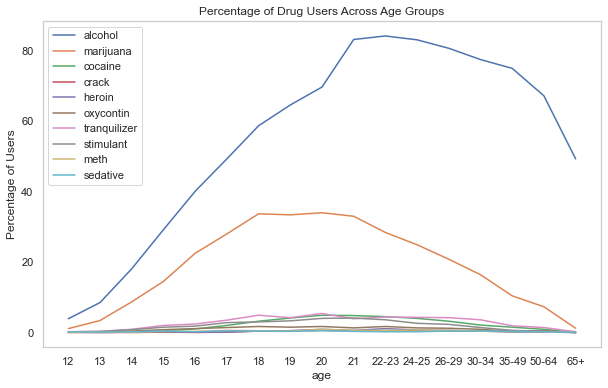

In [61]:
drugs = ['alcohol','marijuana','cocaine','crack','heroin','oxycontin','tranquilizer','stimulant','meth','sedative']

plt.figure(figsize=(10,6))
plt.title("Percentage of Drug Users Across Age Groups")

for drug in drugs:
    sns.lineplot(x='age',y= drug+'-use', data=drug_use_data, label= drug) #mr gortom/stack overflow

plt.grid(False)
plt.ylabel("Percentage of Users")

#### Results:
Alcohol and marijuana are the most frequently used drugs across all age groups. Alcohol is by far the most commonly used drug, the usage peaking at around 85% between the ages of 22 and 23. Marijuana is the second most frequented drug, still by a large margin but less then half as popular as alcohol, with usage peaking at just over 30% at age 18.

### Most common drugs excluding alcohol and marijuana

Text(0, 0.5, 'Percentage of Users')

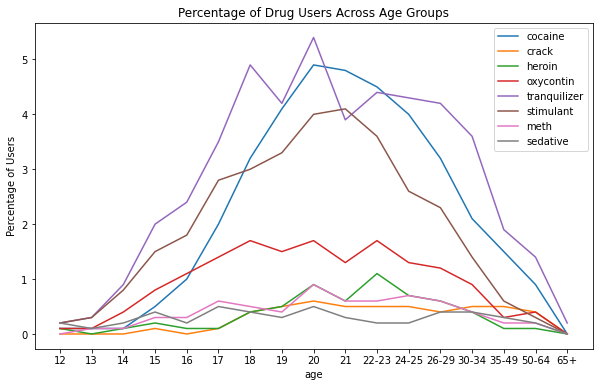

In [4]:
drugs_no_alc_weed = ['cocaine','crack','heroin','oxycontin','tranquilizer','stimulant','meth','sedative']

plt.figure(figsize=(10,6))
plt.title("Percentage of Drug Users Across Age Groups")

for drug in drugs_no_alc_weed:
    sns.lineplot(x='age',y= drug+'-use', data=drug_use_data, label= drug)

plt.ylabel("Percentage of Users")

#### Results:
Without considering alcohol and marijuana, the most popular drugs across all age groups are tranquilizers (peaking at just over 5% at age 20), cocaine (peaking at 5% at age 20), and stimulants (peaking at 4% at age 21). I expected drugs like meth and heroin to be more common than they are because of the publicity they receive but stimulants such and tranquilizers are commonly prescribed for conditions including anxiety, depression, and ADHD.

## How does the popularity of illegal drugs compare to legal drugs?

In [5]:
#adding a new column that describes legality for each drug for each age

illegal_drugs = ['cocaine','crack','heroin','meth']
legal_drugs = ['oxycontin','tranquilizer','stimulant','sedative']

for drug in illegal_drugs:
    drug_use_data[drug + '-legal'] = False
    
for drug in legal_drugs:
    drug_use_data[drug + '-legal'] = True

drug_use_data['alcohol-legal']= [False if i<9 else True for i in range(17)]
drug_use_data['marijuana-legal']= [False if i<9 else True for i in range(17)]

drug_use_data

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,cocaine-legal,crack-legal,heroin-legal,meth-legal,oxycontin-legal,tranquilizer-legal,stimulant-legal,sedative-legal,alcohol-legal,marijuana-legal
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,False,False,False,False,True,True,True,True,False,False
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,False,False,False,False,True,True,True,True,False,False
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,False,False,False,False,True,True,True,True,False,False
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,False,False,False,False,True,True,True,True,False,False
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,False,False,False,False,True,True,True,True,False,False
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,False,False,False,False,True,True,True,True,False,False
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,False,False,False,False,True,True,True,True,False,False
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,False,False,False,False,True,True,True,True,False,False
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,False,False,False,False,True,True,True,True,False,False
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,False,False,False,False,True,True,True,True,True,True


In [62]:
#adding a new column for the number of users of each drug for each age and for the total number of users for each age
user_cols = ['alcohol-use','marijuana-use','cocaine-use','crack-use','heroin-use','oxycontin-use','tranquilizer-use','stimulant-use','meth-use','sedative-use']
for col in user_cols:
    drug_use_data[col + 'rs'] = drug_use_data['n']* drug_use_data[col]/100

user_list = [col+'rs' for col in user_cols]
drug_use_data['total-users']= drug_use_data[user_list].sum(axis=1)

#drug_use_data

In [7]:
#finding the number of illegal drug users for each age group and making a new column
legal_cols = ['alcohol-legal','marijuana-legal','cocaine-legal','crack-legal','heroin-legal','oxycontin-legal','tranquilizer-legal','stimulant-legal','meth-legal','sedative-legal']
user_list = [col+'rs' for col in user_cols]
drug_use_data['total-illegal-users'] = 0.0

for i in range(17):
    for col in legal_cols:
        if drug_use_data[col][i] == False:
            ioc = legal_cols.index(col)
            uc = user_list[ioc]
            drug_use_data['total-illegal-users'][i] = drug_use_data[uc][i] + drug_use_data['total-illegal-users'][i]

drug_use_data

<ipython-input-7-c91b2d978b89>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_use_data['total-illegal-users'][i] = drug_use_data[uc][i] + drug_use_data['total-illegal-users'][i]


,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,cocaine-users,crack-users,heroin-users,oxycontin-users,tranquilizer-users,stimulant-users,meth-users,sedative-users,total-users,total-illegal-users
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,2.798,0.000,2.798,2.798,5.596,5.596,0.000,5.596,165.082,145.496
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,2.757,0.000,0.000,2.757,8.271,8.271,2.757,2.757,355.653,333.597
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,2.792,0.000,2.792,11.168,25.128,22.336,2.792,5.584,820.848,756.632
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,14.780,2.956,5.912,23.648,59.120,44.340,8.868,11.824,1463.220,1324.288
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,30.580,0.000,3.058,33.638,73.392,55.044,9.174,6.116,2125.310,1957.120
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,60.760,3.038,3.038,42.532,106.330,85.064,18.228,15.190,2682.554,2433.438
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,79.008,9.876,9.876,41.973,120.981,74.070,12.345,9.876,2639.361,2392.461
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,91.143,11.115,11.115,33.345,93.366,73.359,8.892,6.669,2507.544,2300.805
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,111.279,13.626,20.439,38.607,122.634,90.840,20.439,11.355,2784.246,2520.810
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,112.992,11.770,14.124,30.602,91.806,96.514,14.124,7.062,3114.342,153.010


Text(0, 0.5, 'Number of Users')

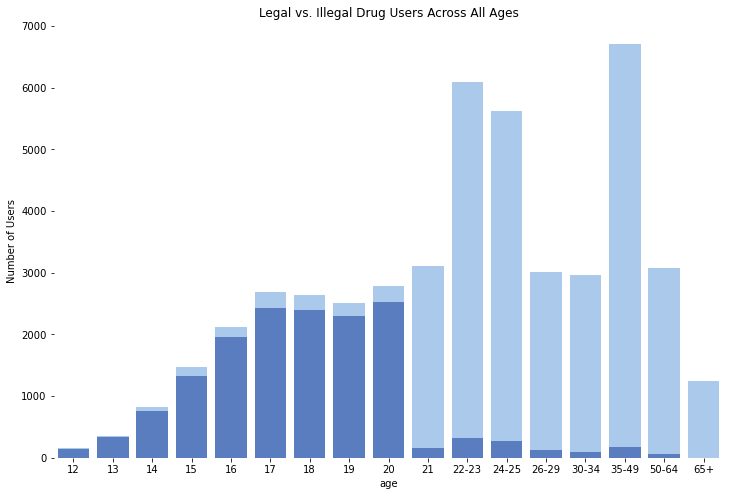

In [8]:
#Create a barplot that represents the data found above
plt.figure(figsize=(12, 8))
plt.title("Legal vs. Illegal Drug Users Across All Ages")

sns.set_color_codes('pastel')
sns.barplot(x='age', y='total-users', data=drug_use_data, label='Total Users', color='b')

sns.set_color_codes('muted')
sns.barplot(x='age', y='total-illegal-users', data=drug_use_data, label='Illegal Users', color='b')

sns.despine(left=True, bottom=True) #seaborn website

plt.ylabel("Number of Users")

## How often during the year do people of all age groups use different drugs?

Text(0, 0.5, 'Median Number of Uses')

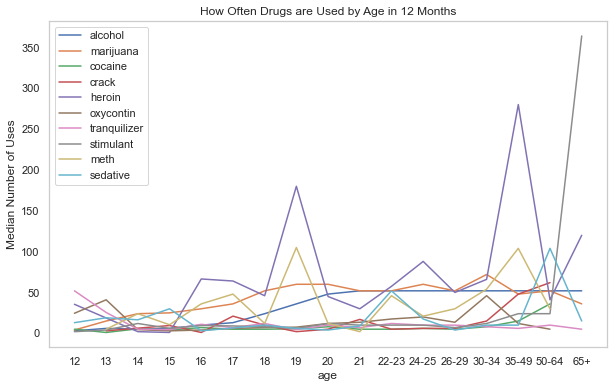

In [58]:
#make frequency columns values numeric and create a line plot to show median numbers of uses of each drug across all age groups 

plt.figure(figsize=(10, 6))
plt.title("How Often Drugs are Used by Age in 12 Months")

drugs = ['alcohol','marijuana','cocaine','crack','heroin','oxycontin','tranquilizer','stimulant','meth','sedative']

for drug in drugs:
    drug_use_data[drug+"-frequency"] = pd.to_numeric(drug_use_data[drug+"-frequency"], errors="coerce") #stack overflow
    sns.lineplot(x='age',y=drug+'-frequency', data=drug_use_data, label = drug)

plt.grid(False) #stack overlfow
plt.ylabel("Median Number of Uses")

Results: Even though alcohol and marijuana are used by more people throughout the year, they are not used more frequently than many other drugs. Heroin is used by less than 1% of people but the people who do use it, use it more frequently, especially within the age groups 19 and 35-49. Of all the drugs, stimulants are most frequented by people 65 and older even though they are used by more people between the ages of 18 and 25.

Text(0, 0.5, 'Median Number of Uses')

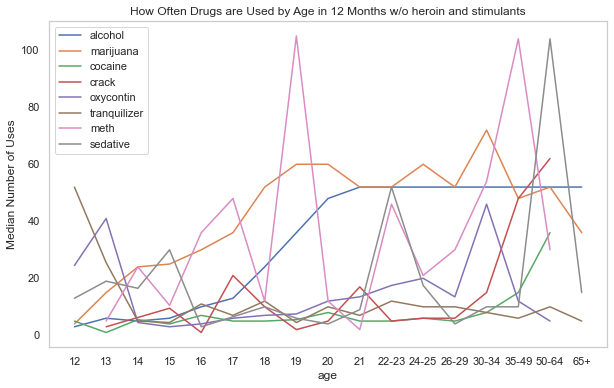

In [59]:
#median drug frequency excluding heroin and stimulants

plt.figure(figsize=(10, 6))
plt.title("How Often Drugs are Used by Age in 12 Months w/o heroin and stimulants")

drugs = ['alcohol','marijuana','cocaine','crack','oxycontin','tranquilizer','meth','sedative']

for drug in drugs:
    sns.lineplot(x='age',y=drug+'-frequency', data=drug_use_data, label = drug)

plt.grid(False)
plt.ylabel("Median Number of Uses")

Results: Even though alcohol and marijuana were used by the largest number of people, they are not used as frequently throughout the year as drugs like meth.